In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("datos_train.csv")
data_test = pd.read_csv("datos_test.csv")
data.head()

T.H.I   T.F.E  I.H.R.V  MCareExp  Tra.Exp  G.F.G.E  H.H.Age  Floor.Area  \
0   Bajo   54975     3600      6264      420        0       71          31   
1   Bajo   71739    12000       191    27048        0       41          80   
2   Bajo   44882     3000       170     1746        0       45          18   
3  Medio  111069        0      6452    16068        0       58          60   
4   Bajo   56916     3000       550     4494        0       32          10   

   House.Age    PPN  ...  Electricity               Young.Members    Roof  \
0         20  57411  ...           Si       Less than 5 years old  Strong   
1         16  24089  ...           Si                 No children  Strong   
2         33  43536  ...           Si  between 5 and 17 years old  Strong   
3         32  37747  ...           Si                 No children  Strong   
4          3  44437  ...           Si       Less than 5 years old  Strong   

    TenueStatus    TypeHousehold         Worker  TypeBuilding   Walls Toilet  \
0  Partial_Paid  Extended Family            NaN  Single house  Strong   Poor   
1    Fully_Paid  Extended Family  Civil_Servant  Single house  Strong   Good   
2  Partial_Paid  Extended Family       Employee  Single house  Strong   Good   
3    Fully_Paid    Single Family       Employee  Single house  Strong   Good   
4  Partial_Paid    Single Family      Freelance  Single house   Light   Good   

             Water  
0  Good conditions  
1  Good conditions  
2  Good conditions  
3  Good conditions  
4  Good conditions  

[5 rows x 44 columns]

In [3]:
#Definimos nuestra variable target
y = data[['T.H.I']]
# precio de venta de la casa, gastos de lujo, bienes y servicios, gastos comida)
X = data[['T.F.E', 'I.H.R.V', 'Tra.Exp', 'CYP', 'GL', 'BYS']]

## Definiendo el número de clusters óptimo

Antes de empezarcon nuestro modelo, debemos de determinar cual es el número óptimo de clusters para nuestras variables predictoras. Decidimos calcular la inercia, no sin antes escalar nuestros datos en valores de 0 y 1, y la representaremos para visualizar más facilmente el k óptimo

In [4]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X)
Xs = scaler.transform(X)

In [5]:
Xs = pd.DataFrame(data=Xs, columns=['T.F.E', 'I.H.R.V', 'Tra.Exp', 'CYP', 'GL', 'BYS'])
Xs.head()

T.F.E  I.H.R.V   Tra.Exp       CYP        GL       BYS
0  0.068233   0.0030  0.000779  0.033179  0.005430  0.009291
1  0.091721   0.0100  0.050181  0.059435  0.079411  0.079558
2  0.054092   0.0025  0.003239  0.031978  0.008753  0.010856
3  0.146825   0.0000  0.029811  0.075776  0.086977  0.062781
4  0.070952   0.0025  0.008338  0.044276  0.003218  0.006388

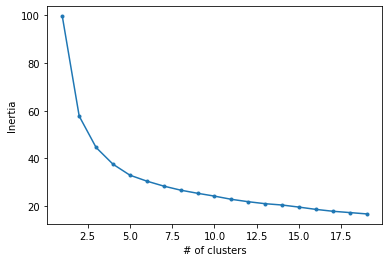

In [6]:
from sklearn.cluster import KMeans

K = range(1,20)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(Xs)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

### Adecuando nuestros datos a una clusterización k-means

Nuestros datos cuentan con variables cuyos datos son muy densos, no muy adecuados para clusterización ya que los centroides quedarán muy centrados. Por lo tanto, una buena práctica que podemos aplicar sería crear más número de clusters hasta encontrar una cantidad de puntos suficientes para juntarlos, y generar de esa forma nuestros tres grupos que encontramos en nuestra variable objetivo (income).

In [29]:
# Usar muchos clusters hasta enontrar una cantidad de puntossuficientes para juntarlos.
# Comparar las proporciones de la variable target 

Kmeans = KMeans(n_clusters = 7, random_state = 0).fit(Xs) #queremos hacer 3 clusters
#clusters = kmeans.fit_predict(X)
centroids = Kmeans.cluster_centers_
print(centroids)


[[5.26039193e-02 7.45982842e-03 7.15247057e-03 3.02725398e-02
  1.33104619e-02 1.49481488e-02 2.00000000e+00]
 [1.02388068e-01 1.23425337e-02 1.51490317e-02 6.47915408e-02
  3.07954020e-02 2.90894247e-02 1.00000000e+00]
 [1.55240630e-01 2.39752994e-02 3.22292721e-02 9.74268149e-02
  7.18809699e-02 6.18898248e-02 1.46549439e-14]
 [2.08495093e-01 4.76214789e-02 7.92000707e-02 1.04236436e-01
  1.78736944e-01 1.29525105e-01 2.00000000e+00]
 [6.42540275e-01 4.30000000e-01 4.40357895e-01 3.87005237e-01
  4.77918996e-01 6.96151320e-01 1.00000000e+00]
 [3.59904348e-01 7.80625000e-02 1.14744974e-01 2.01437433e-01
  3.11925275e-01 1.97512349e-01 1.55431223e-15]
 [2.41853117e-01 3.22157895e-02 4.39417108e-02 1.87347648e-01
  9.28029141e-02 8.90549358e-02 1.99840144e-15]]


In [30]:
Kmeans.labels_

Xs["labels"] = Kmeans.labels_

Xs.head(5)

T.F.E  I.H.R.V   Tra.Exp       CYP        GL       BYS  labels
0  0.068233   0.0030  0.000779  0.033179  0.005430  0.009291       0
1  0.091721   0.0100  0.050181  0.059435  0.079411  0.079558       1
2  0.054092   0.0025  0.003239  0.031978  0.008753  0.010856       0
3  0.146825   0.0000  0.029811  0.075776  0.086977  0.062781       2
4  0.070952   0.0025  0.008338  0.044276  0.003218  0.006388       0

In [31]:
Xs["labels"].value_counts()

0    2069
1    1855
2     999
6     288
3     284
5      96
4       9
Name: labels, dtype: int64

In [40]:
kmeans_class = pd.crosstab(Xs['labels'], y['T.H.I']).apply(lambda r: r/r.sum(), axis=1)

print(kmeans_class)

T.H.I       Alto      Bajo     Medio
labels                              
0       0.000000  0.995650  0.004350
1       0.000539  0.952561  0.046900
2       0.037037  0.609610  0.353353
3       0.397887  0.073944  0.528169
4       1.000000  0.000000  0.000000
5       0.791667  0.020833  0.187500
6       0.156250  0.232639  0.611111


In [51]:
fig = px.imshow(kmeans_class, color_continuous_scale=px.colors.sequential.Tealgrn,
                labels=dict(x="variable objetivo", y="k-mean clusters", color="probabilidad"),
                x=['Alto', 'Bajo', 'Medio'])
fig.show()

Podemos ver gracias a esta tabla de proporciones con nuestra variable objetivo income, que de nuestros clusters generados con k-means podemos agrupar varios de ellos.

De esta forma, los clusters 0, 1 y 2 entrarían en la categoría Bajo, 3 y 6 para Medio y 4 y 5 para Alto

Hagamos una visualización rápida de los clusters generados en cada una de nuestras variables predictoras frente a la división que generaria nuestra variable objetivo income

In [58]:
import plotly.express as px
df = Xs
fig = px.scatter_matrix(df, dimensions=['BYS','T.F.E','I.H.R.V','GL'], color="labels", color_continuous_scale=px.colors.diverging.Portland)
fig.show()

In [ ]:
kmeans_class.plot(kind="bar", 
                 figsize=(8,8),
                 cmap = 'Set3',
                 stacked=True)

In [60]:
Xs = Xs.join(y)

In [61]:
Xs['T.H.I'].value_counts()

Bajo     4526
Medio     793
Alto      281
Name: T.H.I, dtype: int64

In [63]:
import plotly.express as px
df = Xs
fig = px.scatter_matrix(df, dimensions=['BYS','T.F.E','I.H.R.V','GL'], color="T.H.I", color_continuous_scale=px.colors.diverging.Portland)
fig.show()

### Bonus point: Silouette analysis

Otra medida a tener en cuenta para determinar el número óptimo de clusters es el silhouette score. Alto s valores muestra que los objetos están siendo bien emarejados con su cluster y mal emparejado con sus clusters vecinos. Esta medida se calcula con la distacia euclidea entre los diferentes puntos 

In [85]:
Xs = Xs.drop('T.H.I', axis = 1)

In [86]:
from sklearn.metrics import silhouette_score
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Xs)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Xs, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8762603013737086)
For n_clusters = 3, silhouette score is 0.9114404228442698)
For n_clusters = 4, silhouette score is 0.9115840191511393)
For n_clusters = 5, silhouette score is 0.5179234528238392)
For n_clusters = 6, silhouette score is 0.3579239622143822)
For n_clusters = 7, silhouette score is 0.3412999074832891)
For n_clusters = 8, silhouette score is 0.3371260380203497)
For n_clusters = 9, silhouette score is 0.26331398071278656)


## Conclusiones

Podemos concluir que nuestros datos no son los más óptimos para aplicar clusters. Sin embargo, hemos intentado abordar un problema de clusterización con k-means generando múltiples grupos e intentando reagruparlos basándonos en sus probabilidades frente a la variable objetivo